In [59]:
import math
import random
from copy import deepcopy
import matplotlib.pyplot as plt
from tqdm import tqdm

random.seed(69)

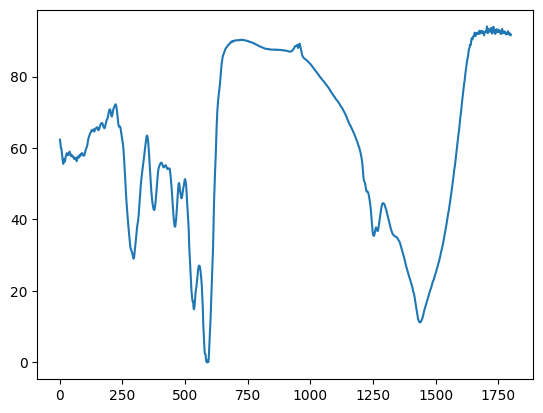

In [82]:
import pandas as pd

df = pd.read_csv('data.csv', sep = ";")

# x = list(df.columns.values)[1:]
# x = [float(i) for i in x]
s = df.loc[2, :].values.tolist()[1:]

min_s = abs(min(s))
for i in range(len(s)):
    s[i] += min_s
max_s = max(s)
for i in range(len(s)):
    s[i] *= 94 / max_s

x = list(range(1, 1801))

plt.plot(x, s)
plt.show()

In [83]:
def g(x, a, b, c):
    if sigma != 0:
        return a * math.exp(- math.pow(x - b, 2) / (2 * math.pow(c, 2)))
    else:
        return 0

def f(x, params):
    result = 0
    for i in range(len(params)):
        result += g(x, params[i][0], params[i][1], params[i][2])
    return result

def mse(params):
    result = 0
    for i in range(len(x)):
        result += math.pow(s[i] - f(x[i], params), 2)
    return result

def clonal_selection(fitness_function, population_size, n_iterations):
    number_of_gaussians = 10
    
    percentage_of_cloning = 18
    clone_size = 5
    mutation_rate = 0.6

    population = []
    max_fit = []
    
    for i in range(population_size):
        individual = []
        for j in range(number_of_gaussians):
            individual.append([random.randrange(0, 100), random.randrange(0, 1800), random.randrange(1, 1000)])
        population.append(individual)

    with tqdm(total=n_iterations) as pbar:
        for i in range(n_iterations):
            population = sorted(population, key=lambda x: fitness_function(x))
            max_fit.append(mse(population[0]))
    
            new_population = []
            for individual in population[:len(population) * percentage_of_cloning // 100]:
                clones = [individual.copy() for j in range(clone_size)]
                for clone in clones:
                    if random.random() < mutation_rate:
                        clone[random.randint(0, len(clone) - 1)] = [random.randrange(0, 100), random.randrange(0, 1800), random.randrange(1, 1000)]
                new_population.extend(clones)
            new_population.extend(population)
            population = new_population[:population_size]
            pbar.update(1)
    return population[0], max_fit

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [12:46<00:00,  3.83s/it]


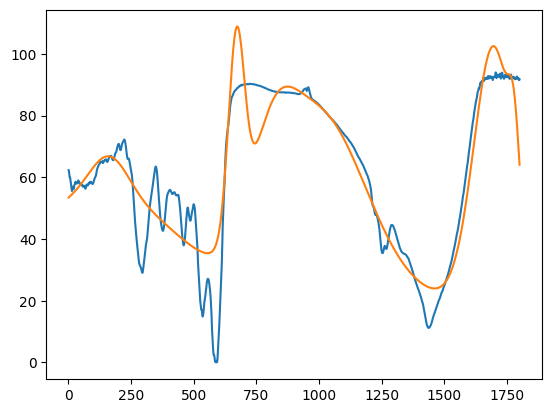

In [84]:
best_ind, max_fit = clonal_selection(mse, 500, 200)

fun = []
for xi in x:
    fun.append(f(xi, best_ind))
plt.plot(x, s)
plt.plot(x, fun)
plt.show()

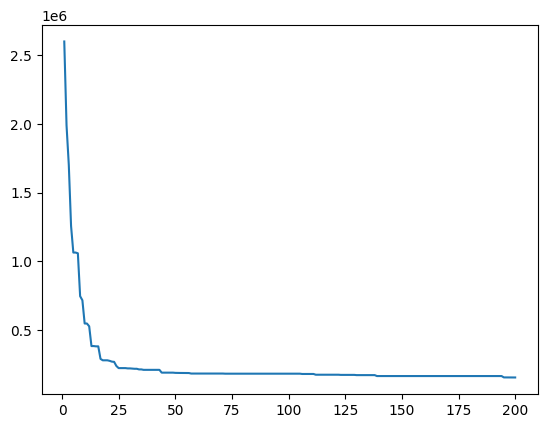

In [85]:
y = list(range(1, len(max_fit) + 1))
plt.plot(y, max_fit)
plt.show()

In [81]:
print(best_ind_0)

[[0, 1195, 74], [1, 1791, 164], [0, 1314, 505], [1, 971, 167], [1, 5, 411]]
